### Spambase - Exploratory Data Analysis (EDA)

#### Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# --- Import Spambase Column Names ---
spambase_columns = [
    "word_freq_make",
    "word_freq_address",
    "word_freq_all",
    "word_freq_3d",
    "word_freq_our",
    "word_freq_over",
    "word_freq_remove",
    "word_freq_internet",
    "word_freq_order",
    "word_freq_mail",
    "word_freq_receive",
    "word_freq_will",
    "word_freq_people",
    "word_freq_report",
    "word_freq_addresses",
    "word_freq_free",
    "word_freq_business",
    "word_freq_email",
    "word_freq_you",
    "word_freq_credit",
    "word_freq_your",
    "word_freq_font",
    "word_freq_000",
    "word_freq_money",
    "word_freq_hp",
    "word_freq_hpl",
    "word_freq_george",
    "word_freq_650",
    "word_freq_lab",
    "word_freq_labs",
    "word_freq_telnet",
    "word_freq_857",
    "word_freq_data",
    "word_freq_415",
    "word_freq_85",
    "word_freq_technology",
    "word_freq_1999",
    "word_freq_parts",
    "word_freq_pm",
    "word_freq_direct",
    "word_freq_cs",
    "word_freq_meeting",
    "word_freq_original",
    "word_freq_project",
    "word_freq_re",
    "word_freq_edu",
    "word_freq_table",
    "word_freq_conference",
    "char_freq_;",
    "char_freq_(",
    "char_freq_[",
    "char_freq_!",
    "char_freq_$",
    "char_freq_#",
    "capital_run_length_average",
    "capital_run_length_longest",
    "capital_run_length_total",
    # finally the target label column:
    "label"
]

#### 1. Load Spambase Dataset

In [8]:
# --- 1. Load the Spambase Dataset ---
file_path = r'C:\Users\User\Documents\MyProjects\FYP_ResearchProject\data\spambase\spambase.data'
df = pd.read_csv(file_path, header=None, names=spambase_columns)

# To show the data into the .csv format
# df.to_csv('spambase.csv', index=False)

# Load the first 5 rows to check
print("First 5 rows of the Spambase dataset:")
print(df.head())
print("Dataset loaded successfully!")

First 5 rows of the Spambase dataset:
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.0

In [9]:
# To show and explain attribute and meanings
descriptions = [
    "percentage of words in the e-mail that match 'make'",
    "percentage of words in the e-mail that match 'address'",
    "percentage of words in the e-mail that match 'all'",
    "percentage of words in the e-mail that match '3d'",
    "percentage of words in the e-mail that match 'our'",
    "percentage of words in the e-mail that match 'over'",
    "percentage of words in the e-mail that match 'remove'",
    "percentage of words in the e-mail that match 'internet'",
    "percentage of words in the e-mail that match 'order'",
    "percentage of words in the e-mail that match 'mail'",
    "percentage of words in the e-mail that match 'receive'",
    "percentage of words in the e-mail that match 'will'",
    "percentage of words in the e-mail that match 'people'",
    "percentage of words in the e-mail that match 'report'",
    "percentage of words in the e-mail that match 'addresses'",
    "percentage of words in the e-mail that match 'free'",
    "percentage of words in the e-mail that match 'business'",
    "percentage of words in the e-mail that match 'email'",
    "percentage of words in the e-mail that match 'you'",
    "percentage of words in the e-mail that match 'credit'",
    "percentage of words in the e-mail that match 'your'",
    "percentage of words in the e-mail that match 'font'",
    "percentage of words in the e-mail that match '000'",
    "percentage of words in the e-mail that match 'money'",
    "percentage of words in the e-mail that match 'hp'",
    "percentage of words in the e-mail that match 'hpl'",
    "percentage of words in the e-mail that match 'george'",
    "percentage of words in the e-mail that match '650'",
    "percentage of words in the e-mail that match 'lab'",
    "percentage of words in the e-mail that match 'labs'",
    "percentage of words in the e-mail that match 'telnet'",
    "percentage of words in the e-mail that match '857'",
    "percentage of words in the e-mail that match 'data'",
    "percentage of words in the e-mail that match '415'",
    "percentage of words in the e-mail that match '85'",
    "percentage of words in the e-mail that match 'technology'",
    "percentage of words in the e-mail that match '1999'",
    "percentage of words in the e-mail that match 'parts'",
    "percentage of words in the e-mail that match 'pm'",
    "percentage of words in the e-mail that match 'direct'",
    "percentage of words in the e-mail that match 'cs'",
    "percentage of words in the e-mail that match 'meeting'",
    "percentage of words in the e-mail that match 'original'",
    "percentage of words in the e-mail that match 'project'",
    "percentage of words in the e-mail that match 're'",
    "percentage of words in the e-mail that match 'edu'",
    "percentage of words in the e-mail that match 'table'",
    "percentage of words in the e-mail that match 'conference'",
    "percentage of characters in the e-mail that match ';'",
    "percentage of characters in the e-mail that match '('",
    "percentage of characters in the e-mail that match '['",
    "percentage of characters in the e-mail that match '!'",
    "percentage of characters in the e-mail that match '$'",
    "percentage of characters in the e-mail that match '#'",
    "average length of uninterrupted sequences of capital letters",
    "length of longest uninterrupted sequence of capital letters",
    "total number of capital letters in the e-mail",
    "target variable, denotes whether the e-mail was considered spam (1) or not (0)"
]

attribute_info = pd.DataFrame({
    'Attribute' : spambase_columns,
    'Descriptions' : descriptions
})

# Display the full table of attribute descriptions
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None) 
display(attribute_info)


,Attribute,Descriptions
0,word_freq_make,percentage of words in the e-mail that match 'make'
1,word_freq_address,percentage of words in the e-mail that match 'address'
2,word_freq_all,percentage of words in the e-mail that match 'all'
3,word_freq_3d,percentage of words in the e-mail that match '3d'
4,word_freq_our,percentage of words in the e-mail that match 'our'
5,word_freq_over,percentage of words in the e-mail that match 'over'
6,word_freq_remove,percentage of words in the e-mail that match 'remove'
7,word_freq_internet,percentage of words in the e-mail that match 'internet'
8,word_freq_order,percentage of words in the e-mail that match 'order'
9,word_freq_mail,percentage of words in the e-mail that match 'mail'


#### 2. Initial Inspection

In [10]:
# Get descriptive statistics for numerical columns.
# This gives mean, std, min, max, and quartiles.
print("\nDescriptive Statistics: ")
print(df.describe())


Descriptive Statistics: 
       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min 

#### 3. Check for missing values

In [11]:
# Check for missing values
print("\nMissing values per column: ")
print(df.isnull().sum())


Missing values per column: 
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_t

#### 4. Check for duplicate rows

In [12]:
print(f"Original shape of Spambase data: {df.shape}")

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"\nNumber of duplicated rows in dataset : {num_duplicates}")

# Remove duplicates - less bias, less time to run qsvm too
if num_duplicates > 0:
    df.drop_duplicates(inplace=True)
    print(f"Removed {num_duplicates} duplicate rows")
    print(f"New dataset shape : {df.shape}")

Original shape of Spambase data: (4601, 58)

Number of duplicated rows in dataset : 391
Removed 391 duplicate rows
New dataset shape : (4210, 58)


In [13]:
# Total columns are 58 (0 to 57). The last one (index 57) is the class label.
# feature_names = [f'feature_{i}' for i in range(57)]
# column_names = feature_names + ['class']
# df.columns = column_names

# print("\nDataFrame with assigned column names:")
# print(df.head())


#### 5. Seperate Features (X) and Target (y)

In [14]:
# --- 4. Separate Features (X) and Target (y) ---
X_spambase = df.drop('label', axis=1) # All columns except 'label' / drop a column
y_spambase = df['label']              # The 'label' column

print(f"\nShape of features (X_spambase): {X_spambase.shape}")
print(f"Shape of target (y_spambase): {y_spambase.shape}")

# .shape - returns a tuple that represents the dimensions of df

'''
# 57 features (all the word_freq_..., char_freq_..., capital_run_length_...)
# 1 label column (label) that tells you if the email is spam (1) or not (0)

'''


Shape of features (X_spambase): (4210, 57)
Shape of target (y_spambase): (4210,)


'\n# 57 features (all the word_freq_..., char_freq_..., capital_run_length_...)\n# 1 label column (label) that tells you if the email is spam (1) or not (0)\n\n'

#### 6. Explore Target Variable Distribution


 ----- Distribution of 'label' (target variable): ----- 
label
0    2531
1    1679
Name: count, dtype: int64

 ----- Percentage distribution of 'label': ----- 
label
0    60.118765
1    39.881235
Name: proportion, dtype: float64


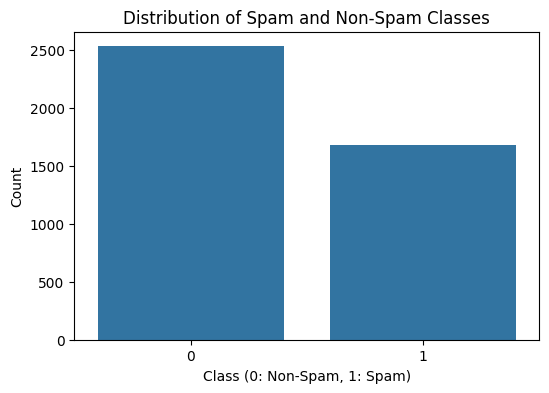

In [15]:
# Explore Target Variable Distribution (To see balanced or Imbalanced)
# Penting untuk classification task

# To check how many spam and non-spam emails you have — both in raw count and as a percentage — and to visualize it using a bar chart.

print("\n ----- Distribution of 'label' (target variable): ----- ")
print(y_spambase.value_counts())
print("\n ----- Percentage distribution of 'label': ----- ")
print(y_spambase.value_counts(normalize=True) * 100)  # makes it show percentages instead of counts.

plt.figure(figsize=(6, 4))
sns.countplot(x=y_spambase)
plt.title('Distribution of Spam and Non-Spam Classes')
plt.xlabel('Class (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.show()

#### 7. Feature Distributions (Histogram)

In [16]:
# Instead of plotting 3 features, grouping them logically could show even deeper analysis
# Can better analyze them in their logical groups : word, frequencies, character frequencies and capital letter metrics

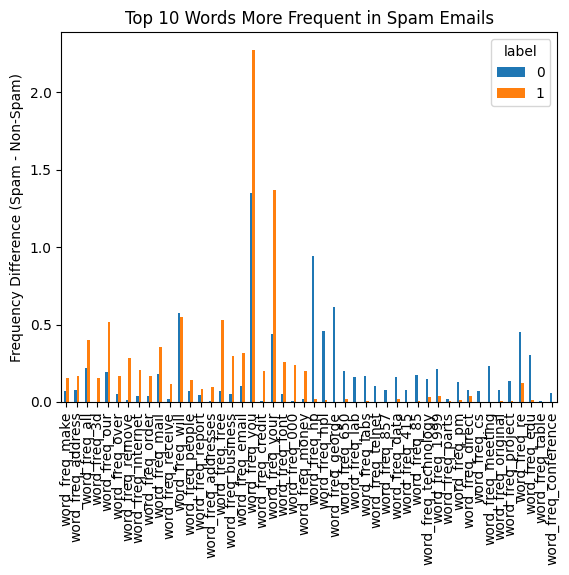

In [17]:
# PART FOR WORD_FREQUENCIES
# Just a fast way rather than typing more
word_freq_cols = [col for col in df.columns if 'word_freq' in col]
# Group the dataset, doesnt care spam or not, then calculate the average of each word frequency column.
# The '.T' (transpose) just flips the rows and columns to get one bar per feature
df.groupby('label')[word_freq_cols].mean().T.plot(kind='bar')
plt.title('Top 10 Words More Frequent in Spam Emails')
plt.ylabel('Frequency Difference (Spam - Non-Spam)')
plt.show()

# Result : 
# Each bar will represent average frequency of a specific word across all emails
# blue - non spam
# orange - spam
# taller bar means more frequent in either spam or non-spam

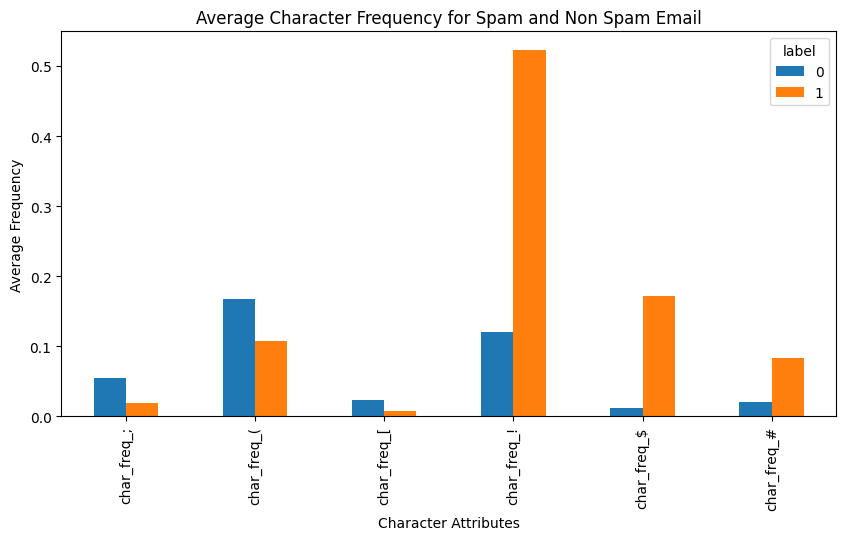

In [18]:
# PART FOR CHARACTER_FREQUENCIES
char_freq_cols = [
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#'
]

# Group by spam and non spam
df.groupby('label')[char_freq_cols].mean().T.plot(kind='bar', figsize=(10,5))
plt.title('Average Character Frequency for Spam and Non Spam Email')
plt.ylabel('Average Frequency')
plt.xlabel('Character Attributes')
plt.show()

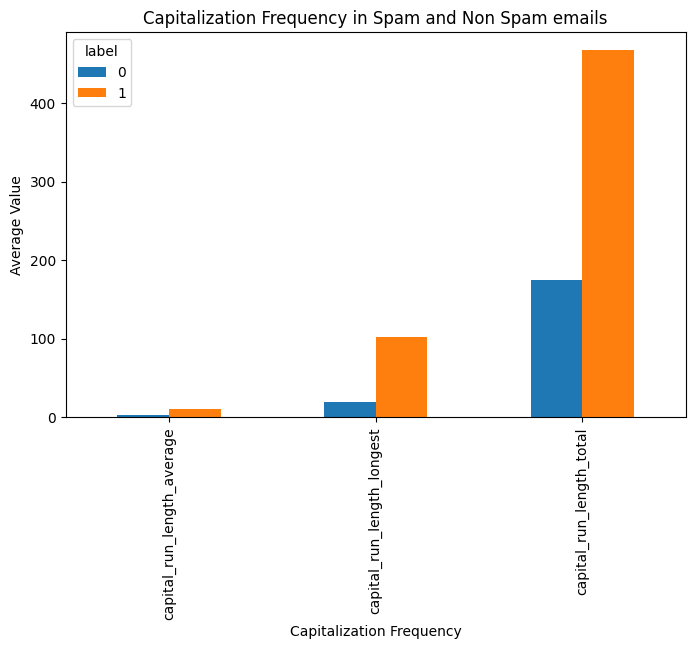

In [19]:
# For the capitalization-related columns
capital_cols = [
    'capital_run_length_average',
    'capital_run_length_longest',
    'capital_run_length_total'
]

# Group by spam and non spam
df.groupby('label')[capital_cols].mean().T.plot(kind='bar', figsize=(8,5))
plt.title('Capitalization Frequency in Spam and Non Spam emails')
plt.ylabel('Average Value')
plt.xlabel('Capitalization Frequency')
plt.show()

#### 8. Outlier Detection - Boxplots

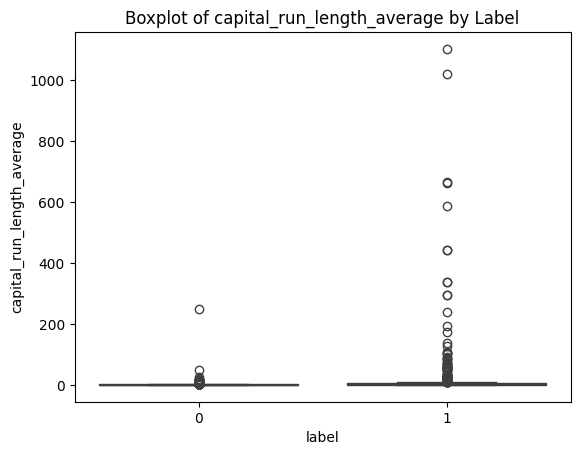

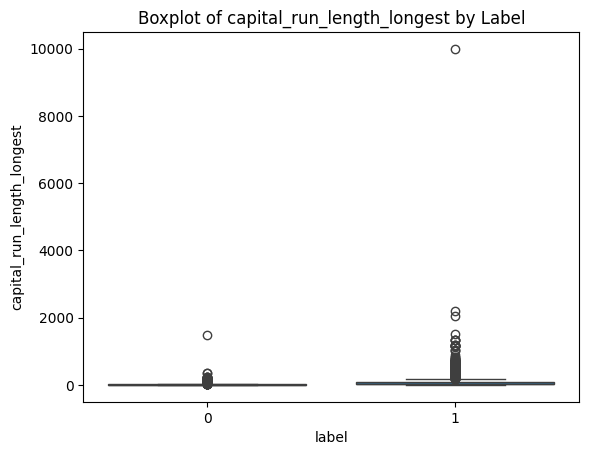

In [20]:
# --- 9. Outlier Detection (Boxplots) ---
# Boxplots for selected features, grouped by class label.
for feat in ['capital_run_length_average','capital_run_length_longest']:
    plt.figure()
    # Using the original df here to easily plot 'label' against features
    sns.boxplot(x='label', y=feat, data=df)
    plt.title(f"Boxplot of {feat} by Label")
    plt.show()

##### 9. Pearson Correlation Heatmap

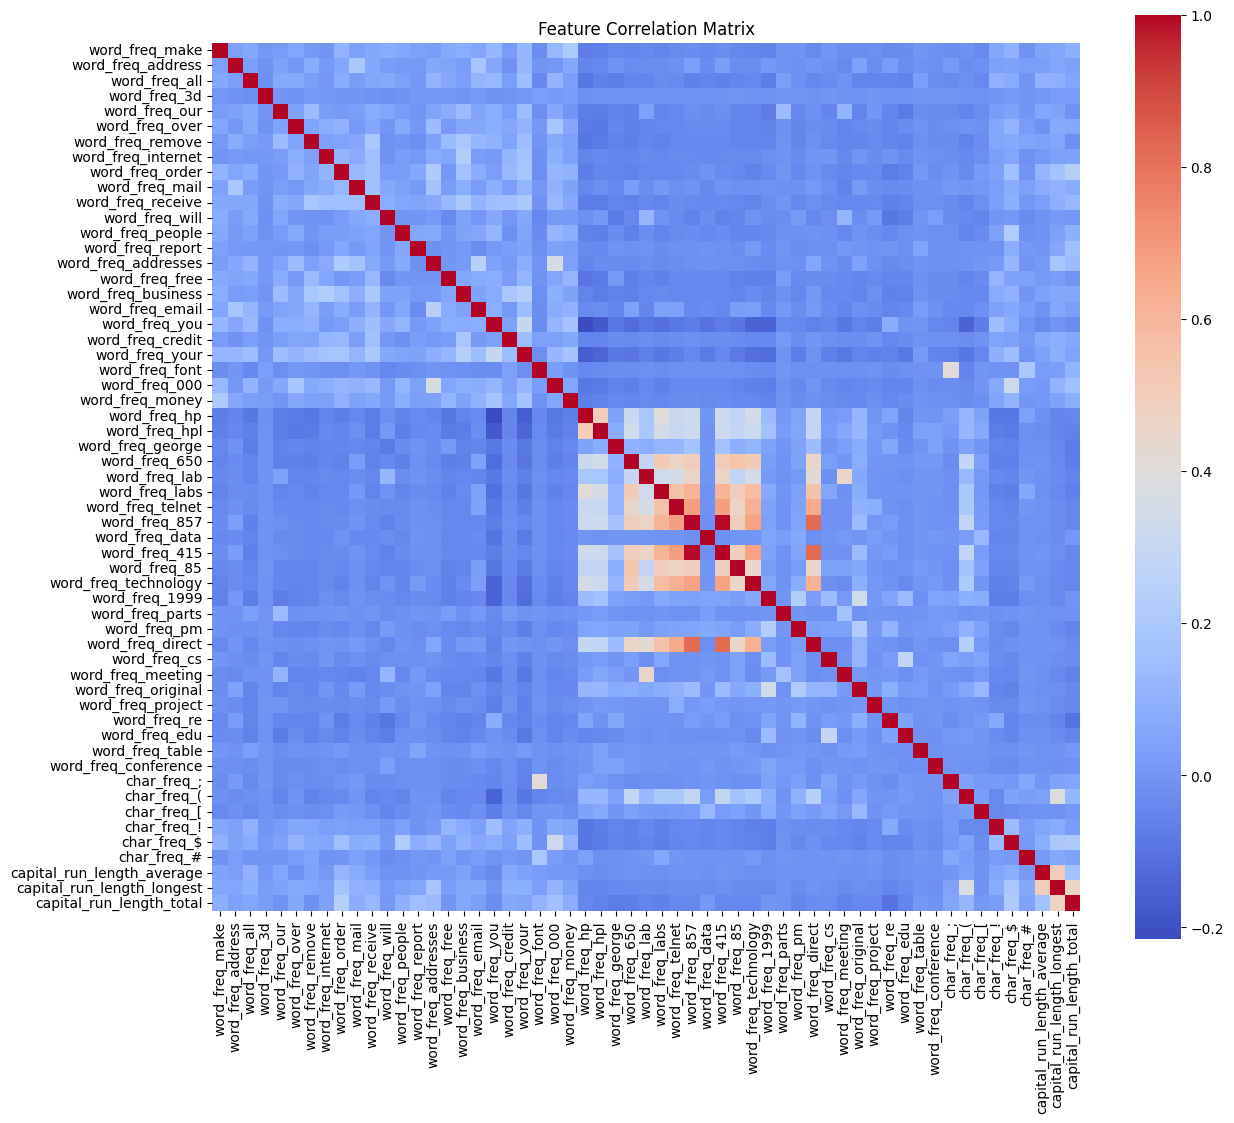

In [21]:
# Correlation Heatmap
# To show that each feature correlates with every other
# |corr|>0.9 - two features carry nearly identical information

'''
This code is creating a correlation heatmap, which is a visual tool to help 
you see how strongly your features relate to each other — and whether any of them are very similar or redundant.

Each square shows the correlation between a pair of features.
The color tells you how strong the relationship is:
- Bright red = very strong positive correlation (close to +1)
- Bright blue = very strong negative correlation (close to –1)
- White/light = weak/no correlation (close to 0)

Diagonal = 1s, because each feature is perfectly correlated with itself

'''

plt.figure(figsize=(14,12))
# Using X_spambase for correlation of features only 
sns.heatmap(X_spambase.corr(), cmap='coolwarm', square=True, cbar=True, annot=False, fmt=".2f") # Added annot=False for less clutter, cbar=True for scale, y=feat - Shows the values of the selected feature on the y-axis
plt.title("Feature Correlation Matrix")
plt.show()

#### 10. Scale and Feature Selection 

In [22]:
# Scale data first then feature selection
# Then do PCA
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_spambase), columns=X_spambase.columns)

# FIND HIGH CORR PARS THEN DROP THE WEAKEST ONES
THRESH = 0.9 

corr_matrix = X_scaled.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)) # Get upper triangle (avoid duplicates)

In [23]:
# --- Feature Selection ---
columns_to_drop = set()
for column in upper_triangle.columns:
    high_corr_partners = upper_triangle.index[upper_triangle[column] > THRESH].tolist()
    if high_corr_partners:
        for partner in high_corr_partners:
            corr_main = y_spambase.corr(X_scaled[column])
            corr_partner = y_spambase.corr(X_scaled[partner])
            print(f"Found pair: ('{column}', '{partner}') with correlation > {THRESH}")
            if abs(corr_main) < abs(corr_partner):
                columns_to_drop.add(column)
                print(f"-> Dropping '{column}' (weaker correlation with target: {abs(corr_main):.3f} vs {abs(corr_partner):.3f})")
            else:
                columns_to_drop.add(partner)
                print(f"-> Dropping '{partner}' (weaker correlation with target: {abs(corr_partner):.3f} vs {abs(corr_main):.3f})")

to_drop_final = sorted(list(columns_to_drop))
print(f"\n--- Feature Selection Complete ---")
print(f"Total features to drop ({len(to_drop_final)}): {to_drop_final}")

# --- Create the Cleaned (but not yet scaled) Feature Set ---
X_clean = X_spambase.drop(columns=to_drop_final)
print(f"\nOriginal number of features: {X_spambase.shape[1]}")
print(f"Number of features after selection: {X_clean.shape[1]}")

Found pair: ('word_freq_415', 'word_freq_857') with correlation > 0.9
-> Dropping 'word_freq_415' (weaker correlation with target: 0.124 vs 0.126)

--- Feature Selection Complete ---
Total features to drop (1): ['word_freq_415']

Original number of features: 57
Number of features after selection: 56


#### 11. Dimensionality Reduction (PCA)

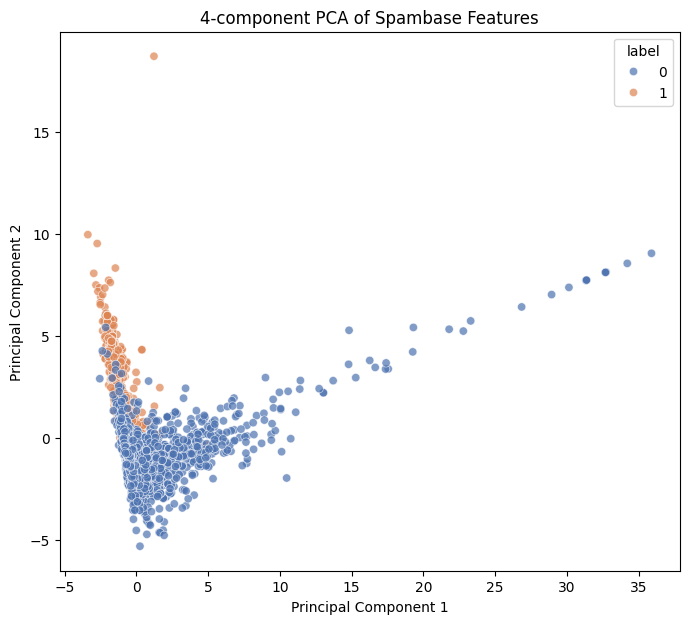

In [24]:
'''
- This block of code creates a scatter plot of your dataset after applying PCA
- it's very helpful for visualizing high-dimensional data (your 57 features) in just 2 dimensions.

'''

# Do PCA
pca = PCA(n_components=4) # Renamed the variable to avoid conflict with potential functions name
X_pca = pca.fit_transform(X_scaled) # Changed 
 
plt.figure(figsize=(8, 7)) # Adjust figure size for better aspect ratio
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_spambase, palette='deep', alpha=0.7)

plt.title("4-component PCA of Spambase Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()